# Real Estate Analysis

## Overview

The real estate market has seen significant fluctuations over the past two years, with many factors affecting housing prices. With such volatility, it has become increasingly important for both buyers and sellers to have accurate predictions of housing prices in order to make informed decisions.

An effective way to accomplish this is through the use of predictive models that take into account various factors, such as location, square footage, number of bedrooms and bathrooms, and other categorical features that may impact housing prices. By analyzing data from past housing transactions and creating models based on these factors, it is possible to predict the likely selling price of a house with a certain degree of accuracy.

Such models can be useful for a variety of purposes, from helping home buyers make informed decisions about which properties to consider, to helping real estate professionals set appropriate listing prices for their clients' homes. While no model can predict the exact price of a home with 100% accuracy, these predictive tools can provide valuable insights into the factors that influence housing prices and help both buyers and sellers navigate the complex and ever-changing real estate market.

## Business Understanding

King of the Deck, a deck design company, has requested that we conduct research for them. They are considering expanding their business to indoor renovations as well. They want to know given a certain amount of space to renovate if it's a better investment to create an outdoor deck or indoor living space. We are tasked with creating a model that predicts house prices, and within that model seeing the affect of each extra square foot of deck space vs living space on overall house price.

<div>
<img src="Images/houses.jpg", width = 600, height = 300/>
</div>

Photo by <a href="https://unsplash.com/photos/f9qZuKoZYoY">Avi Waxman</a> on <a href="/@grstocks">Unsplash</a>

## Data Understanding
 
Most of our data was pulled from <a href="https://info.kingcounty.gov/assessor/DataDownload/default.aspx">King County Assessor Data Download</a> 

In [91]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

We begin by loading and then previewing our data

In [92]:
#we will call our data "re" which stands for real estate
url = 'https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v2-5/main/data/kc_house_data.csv'
#load the data with pandas and then preview it
df = pd.read_csv(url)
re = df.copy()
re.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Our data is different numeric and categorical statistics or describers of houses. Each row in the data represents one house. Our target factor(aka y variable) in the data set is `price`. For all the other columns we will be looking to see it's affect on price. Many of the columns describe square footage of different areas in a house. Others describe when it was built, quality, address, and various other descriptive statistics.

With a brief scan of some of the addresses it seems that all of the houses are in the United States. However, let's right a short code to confirm this

In [93]:
#pull out the last 14 digits from address and create a new row, and take the value counts
#counts of
re['address'].str[-14:].value_counts()

 United States    30155
Name: address, dtype: int64

As we assumed, all the data is indeed from the USA

Now lets take a further look into the statistics within each numerical row

In [94]:
#load desriptive stats of the numeric data
re.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


First thing to note is that we have a pretty large sample size, over 30k houses.

If we look at the min and max in the `yr_built` column we see that the data frame is of houses built between 1900-2022.

Additionally, we see that the median house price is \\$860k, with a minimum of \\$27k and a maximum of around \\$31 million. 

It is interesting to note that some of the houses have 0 bedrooms and/ or 0 bathrooms, which seems strange. There is also a house with 2 square feet above ground which is improbable. So too there is a house with 3 square feet of living area this too is improbable

Additionally, most houses were not renovated.

Our main factors we'll be looking at are `sqft_living` and `sqft_patio`. As such we will take down the median of these categories and rough range. The median of `sqft_living` is around 1900 square feet, while most of the data ranges between 1000-4000 square feet. The median of `sqft_patio` is 150 square feet, while most of the data ranges between 0-500 square feet

Now let's see when the houses were sold

In [95]:
#using the DatetimeIndex from pandas pull out the year the house was sold 
re['year_sold'] = pd.DatetimeIndex(re['date']).year
re.year_sold.value_counts()

2021    19293
2022    10862
Name: year_sold, dtype: int64

We see that all the houses were sold in 2021 and 2022

## Data Preparation

Let's pull up the info of the data, and to see if there are any missing values

In [96]:
#general data info
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

Besides ID which we won't be using, all the data types seem to be inline with the data.

We see that there are 2 columns with missing values let's just drop the rows with missing values, as is it not even .01% of the data

In [97]:
#drop all rows with NaN values
re = re.dropna()

If we look up some of the addresses we see that the number of bedrooms are incorrect. As such we should drop these rows.

## Data Analysis and Modeling

We will begin our data analysis by finding the variable that has the highest correlation with out target variable, `price`. We will attempt to create the best possible model at predicting the price. Once we have that we will determine the affect each extra square foot of patio has on the price of the house.

First, let's pull up a correlation matrix of all the data.

In [98]:
#correlation matrix on all the numeric columns
re.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,year_sold
id,1.000000,-0.034096,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638,-0.009094
price,-0.034096,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,-0.022278,0.073904
bedrooms,-0.007065,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791,-0.027387
bathrooms,-0.012382,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684,-0.042125
sqft_living,-0.028234,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625,-0.029198
sqft_lot,-0.119276,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408,-0.004733
floors,0.031941,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589,-0.017305
sqft_above,-0.023340,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722,-0.023131
sqft_basement,-0.015077,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104,-0.009571
sqft_garage,-0.008044,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639,-0.012821


The above correlation matrix displays pairwise correlation coefficients between variables in a dataset. Each cell in the matrix shows the correlation coefficient between two variables, with the diagonal showing the correlation of a variable with itself (which is always 1 as it is perfectly correlated with itself).

Correlation coefficients range from -1 to 1, -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation. Positive correlation means that when one increases so does the other, while negative means when one increases the other decreases.

This identifying patterns and relationships between variables in a dataset. It shows which variables are highly related to help us decide which variables to use for our model. Additionally, it can be used to detect multicollinearity, which occurs when two or more independent variables in a regression analysis are highly correlated with each other, leading to unstable and unreliable estimates of the coefficients.

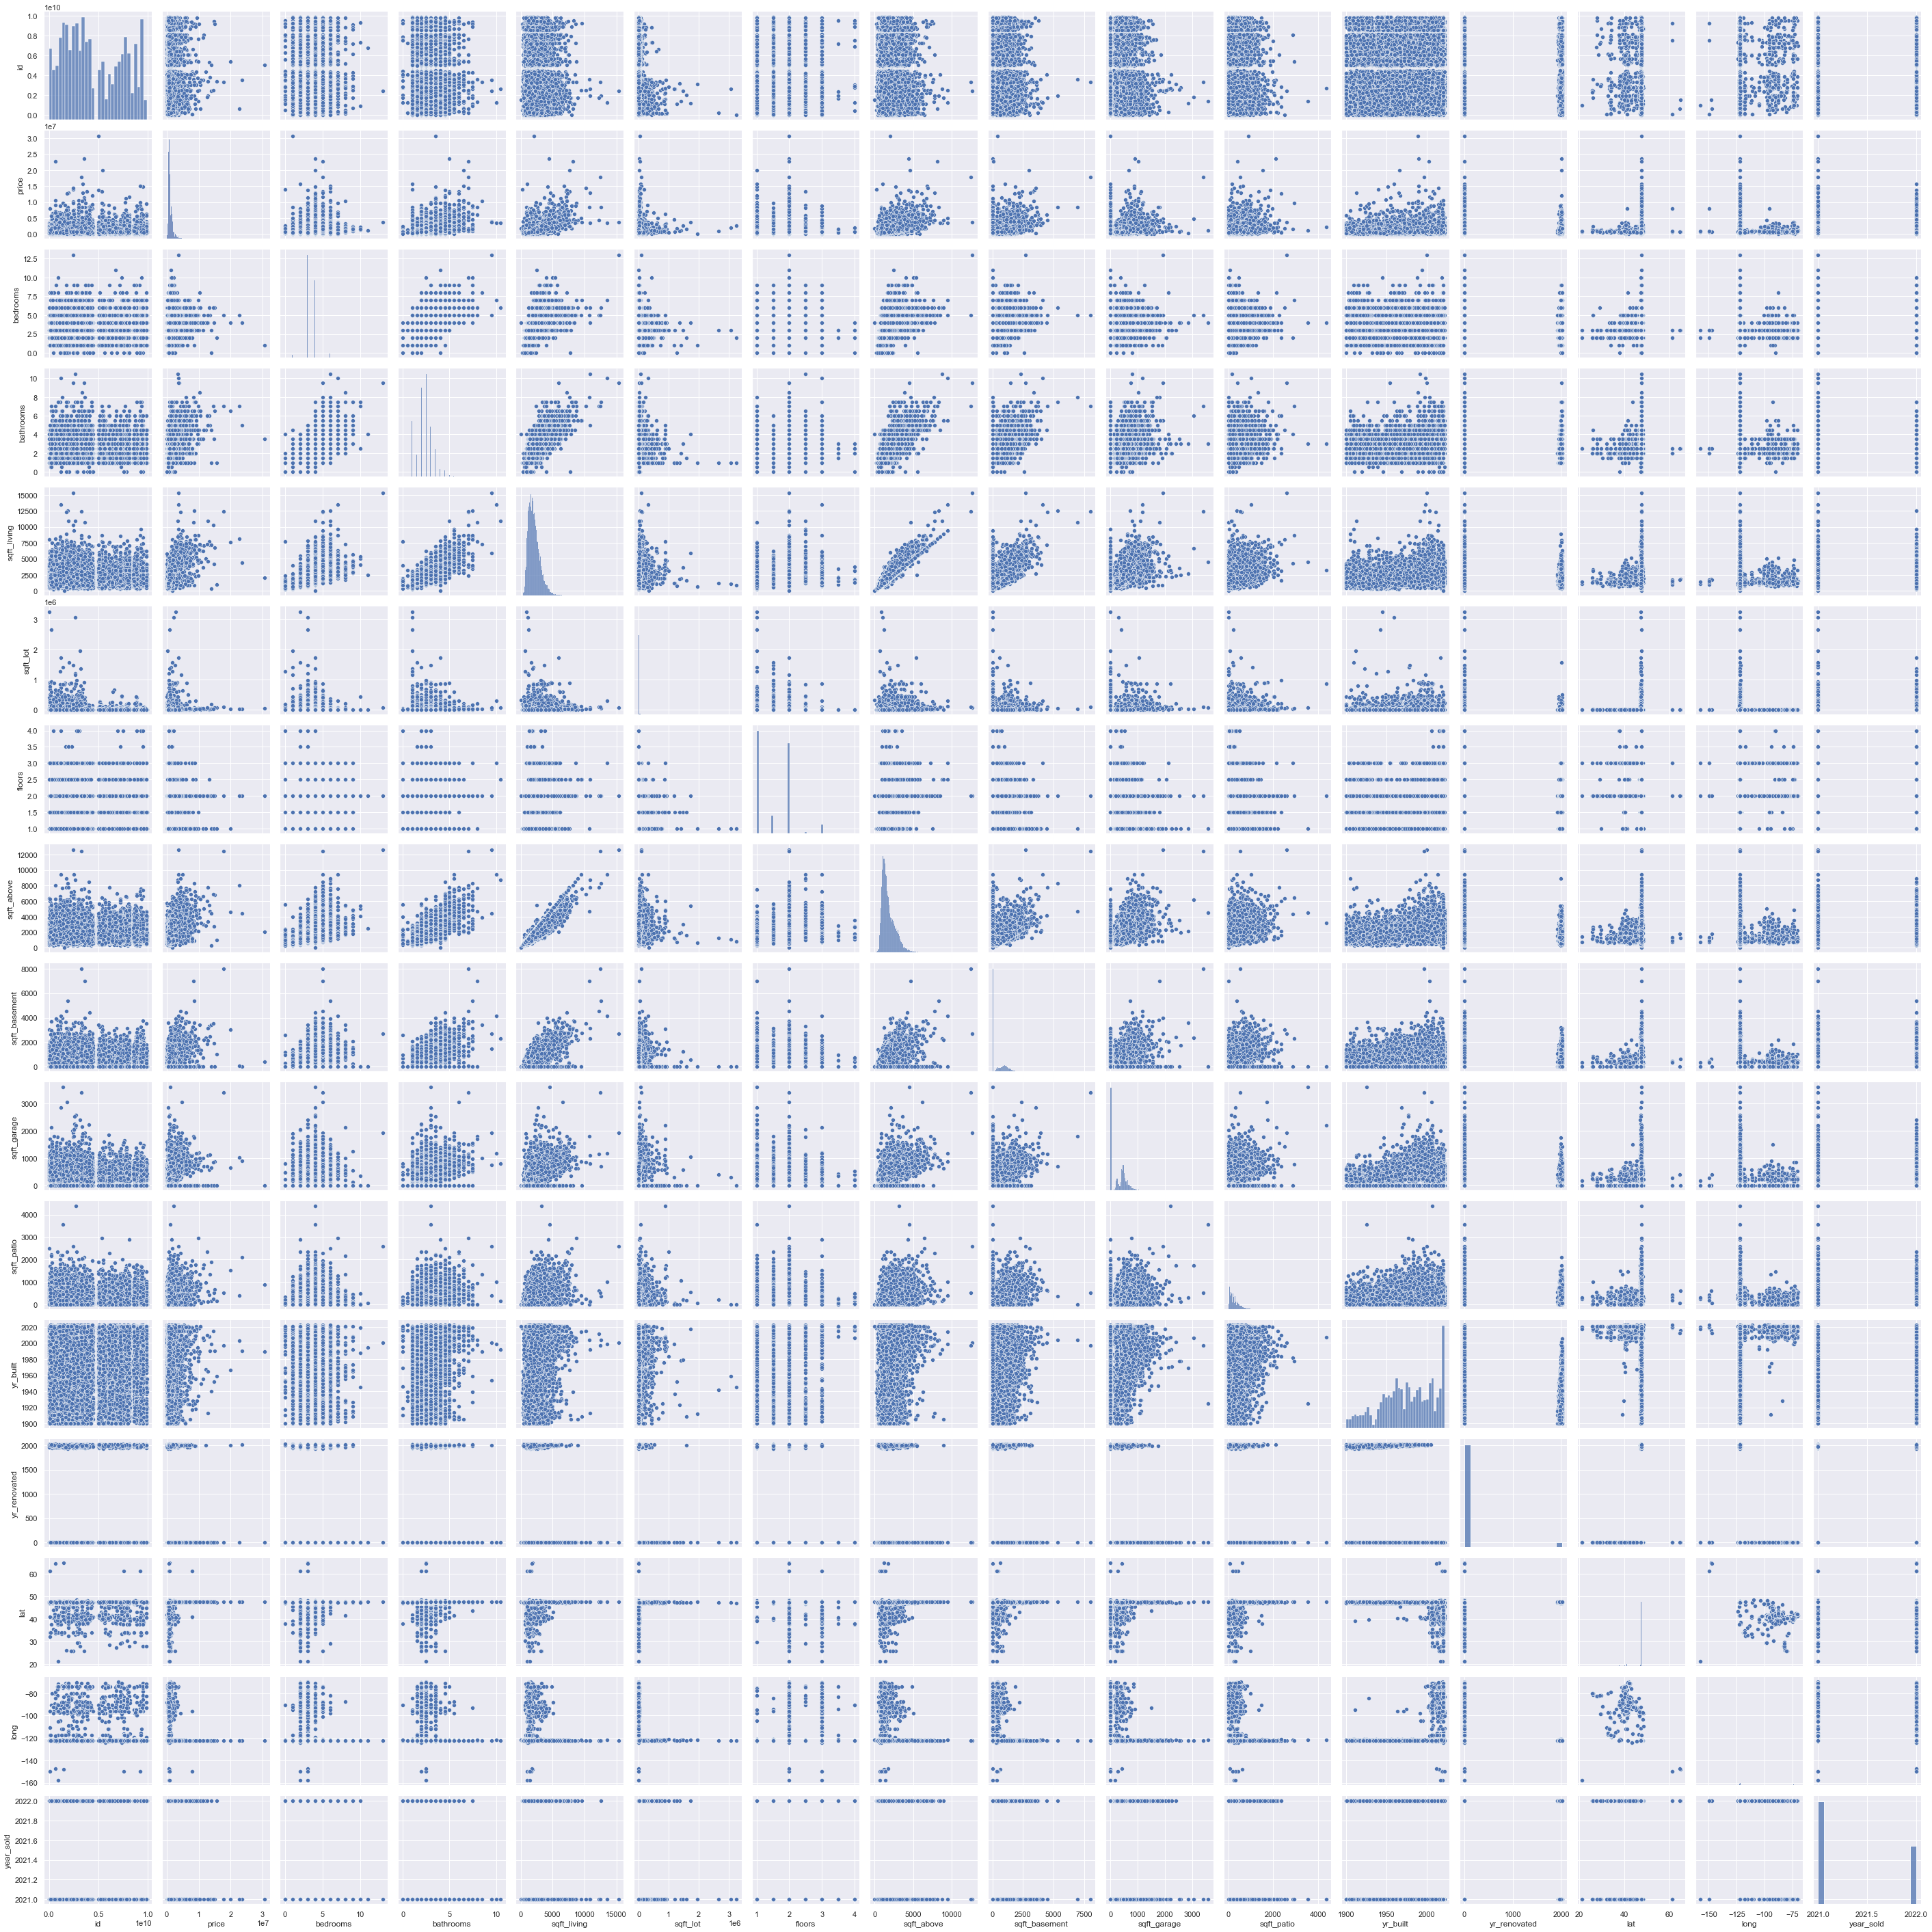

In [99]:
# create a pair plot
sns.pairplot(re.select_dtypes(include=['float64', 'int64']))

Nothing really stands out here.

Now lets create a heatmap to see if we can get a better view

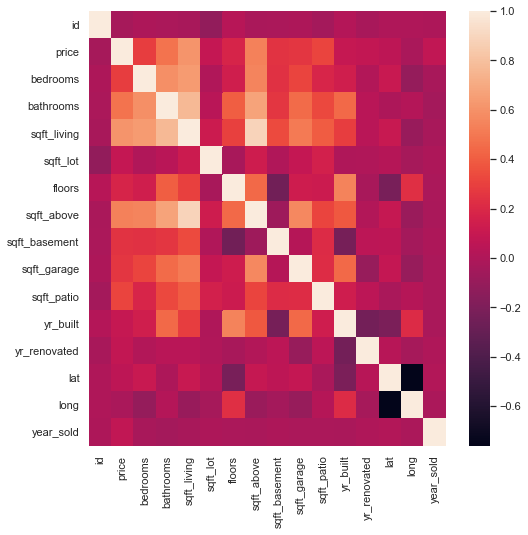

In [100]:
#heatmap of the above correlation matrix
sns.set(rc={'figure.figsize':(8,8)})

sns.heatmap(re.corr());

Again, obviously everything is perfectly correlated with itself. We can sort of notice somewhat high correlations between `bedrooms`, `bathrooms`, `price`, and `sqft living`. Not that everything there is perfect but there seems to be something going in in that zone, with exclusion of `bedrooms` and `price`. Additionally, we see somewhat significant correlations between `sqft_above` and the 4 previously listed factors. 
However we still can't see to much, so let's just pull up individual correlations of each factor with `price`.

In [101]:
#take just the price column out of the corr matrix and order the values in descending order
re_corrs = re.corr()['price'].sort_values(ascending=False)
re_corrs

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
year_sold        0.073904
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

Unsurprisingly price is 100% correlated with itself. The variable with the strongest correlation with price is `sqft_living` with a value of .61. This column describes the total square footage of living space in the home. It is quite logical that this is the highest correlated factor, as in general the bigger the house is, the more it will sell for. 

Let's first pull up some more data exploration. We'll pull up a histogram of price, as well as a scatterplot of latitude vs longitude

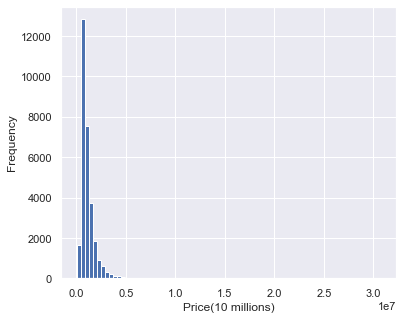

In [102]:
#plot histogram of price. Make sure to indicate that the price is in 10 millions
fig, ax = plt.subplots(figsize=(6,5))
ax.hist('price', data=re, bins=75)
ax.set_xlabel('Price(10 millions)')
ax.set_ylabel('Frequency')
plt.show();

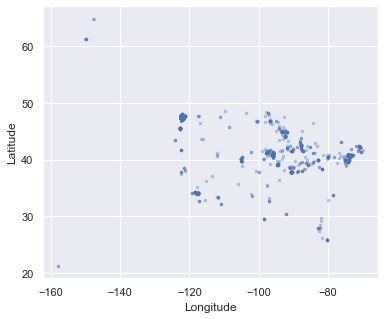

In [103]:
#scatterplot of long vs lat. This should look somewhat like USA, with Alaska and Hawaii
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(x='long', y='lat', data=re, s=6, edgecolors='face', alpha=0.3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

### Single Variable Regression Model

Lets create a basic regression model with the highest correlated value. We should keep in mind that this could also be a negative number(although in this case it clearly isn't). With a correlation value of .61 we shouldn't expect such a great model, as although this doesn't illustrate some significance, it is nowhere near perfect

First we will pull up a scatter plot showing the relationship between `sqft_living` and `price`. In plotting this scatterplot, I encountered an error message; with some interet research I found an import statement that can be used as a workaround. To see more about the issue <a href="https://stackoverflow.com/questions/55109716/c-argument-looks-like-a-single-numeric-rgb-or-rgba-sequence">click here</a>




In [104]:
#import error fixer
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

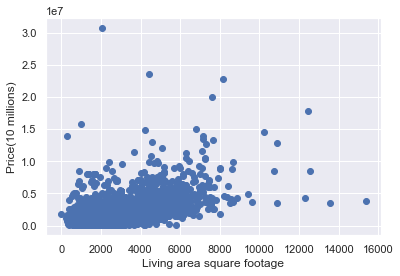

In [105]:
# scatterplot of sqft living vs price
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x='sqft_living', y="price", data=re)
ax.set_ylabel('Price(10 millions)')# set the y-axis label
ax.set_xlabel('Living area square footage'); # set the x-axis

There seems to be some sort of upward trend with a few outlier values, both on the x and y axes.

Now, let's move on to create the actual model. We will first set `price` as our target value, and then `sqft_living` as our X value for our first model. Then we will use methods from statsmodels to create the model. Finally we will pull up the summary stats.

In [106]:
# set y as price(this will be the y for almost all our models). 
# set the X for our first model.
y = re['price']
X_baseline = re['sqft_living']

In [107]:
#create model withs statsmodels.api
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#print summary results
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:33:10   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

Now we will calculate the baseline mean absolute error, and then we will give an analysis of our model.

In [108]:
#using sklearn import calculate the MAE
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
print(f'Baseline Mae: {round(baseline_mae,2)}')

Baseline Mae: 396271.45


`sqft_living` was the attribute most strongly correlated with price, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 37% of the variance in price. Although there is some significance to this number, there definitely is room to improve.
In a typical prediction, the model is off by around $396k. 

- The intercept is at about -\\$76k. This means that a house with 0 square feet of living area  would sell for -\$76k. It is fine that this value doesn't make sense as there is no such thing as a house that is 0 square feet. 
- The coefficient for sqft_living is about \\$560. This means for each additional square foot of living area, the house price increase by $560.

### Adding Other Factors
In hopes of creating a better model we will add in other numerical factors. However, we want to make to sure to avoid multicollinearity, meaning that one factor shouldn't be a good predictor of a different factor. To avoid this we will pull up the correlation between all numerical factors with eachother. The ones with correlation above .7 we won't use. 

The code for this was taken from the from the curriculum on <a href="https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features">this</a>  github page.

In [109]:
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

hi_corr = re.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
hi_corr['pairs'] = list(zip(hi_corr.level_0, hi_corr.level_1))

# set index to pairs
hi_corr.set_index(['pairs'], inplace = True)

#drop level columns
hi_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
hi_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
hi_corr.drop_duplicates(inplace=True)
hi_corr[(hi_corr.cc>.7) & (hi_corr.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.883733
"(sqft_living, bathrooms)",0.772226
"(lat, long)",0.760532


It seems that we should either use long or lat if we plan on using any of them, and probably better to only use one of: sqft_above, sqft_living, bathrooms, as there is high multicollinearity between these values. Since sqft_living is the highest correlated with price we will stick with that. 

So let's reload the correlation values, and create a new model with the values that aren't highly correlated with eachother.

In [110]:
re_corrs

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
year_sold        0.073904
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

Our new X value is all of the numerical factors, except for `sqft_above`, `bathrooms`, `sqft_lot`, `long`, `lat`, and `id`. We tried adding these factors to the model but they didn't have much of an effect on the adjusted r&sup2;.

In [111]:
#plug many X factors in to our 2nd model.
X_2 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage', 'sqft_basement','floors', 
          'yr_built', 'yr_renovated']]

In [112]:
model2 = sm.OLS(y, sm.add_constant(X_2))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2539.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:33:10   Log-Likelihood:            -4.4767e+05
No. Observations:               30111   AIC:                         8.954e+05
Df Residuals:                   30102   BIC:                         8.954e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.577e+06   3.37e+05     16.564

In [113]:
results2_mae = mean_absolute_error(y, results2.predict(sm.add_constant(X_2)))
print(f'Model 2 Mae: {round(results2_mae,2)}')

Model 2 Mae: 381971.71


Our new model is describing the relationship between most of the numerical factors and price.

Overall the model is still statistically significant and is slightly better than the last as it explains 40.3% of the variance in price. This number still isn't great, and could use some improvement. 

All of the individual parts of the model are still statistically significant.

- The model is off by slightly less then the last one, as the MAE is now \\$381K. 
- The constant has had a drastic change and is now roughly \\$5.6 million. Again, it is fine that this number doesn't make sense, as there is no such thing as a house with 0 sqft.
- The coefficient:
    - `sqft_living`:     644.1443.
    - `sqft_patio`:      264.3368   
    - `bedrooms`:      -1.477e+05   
    - `sqft_garage`:     -52.7882   
    - `sqft_basement`:    28.4341    
    - `floors`:         7.007e+04   
    - `yr_built`:      -2780.7161    
    - `yr_renovated`:     66.2543

The values for all the factors except for `bedrooms`, `sqft_garage`, and `yr_built` are all quite reasonable, in that they are positive. Meaning, that usually when you have more square feet in a certain area, more floors, or a newly renovated house the price goes up. However, in general adding extra bedrooms, a larger garage, or a newer house causes the price to go up although this model seems to indicate the opposite. This is a clear sign that the model can use some improvement.

Let's create a row that gives us the age of the house when it was sold to see if this is a better predictor then `yr_built`

In [114]:
#subtract the year built from the yr sold to get the age of the house
re['age'] = re['year_sold'] - re['yr_built']

When we tweak our model to compate `age` and `yr_built` we see that the adjusted r-squared values are the same. As such we will stick with our original model which includes `yr_built`

If we play around with the data a bit, we can create a column that gives the amount of floors per lot size that may have a slightly positive impact on our model, that we can use later on

In [115]:
#divide floors by lotsize to create this factor
re['floors_per_lotsize'] = re['floors']/re['sqft_lot']

## Adding Categorical Factors

Let's move on and add in categorical factors to our model

We'll begin by creating a list of all the categorical factors

In [116]:
#create list comprehension of categorical columns 
catCols = [col for col in re.columns if re[col].dtype=="O"]
catCols

['date',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'address']

It is probably fair to assume that address doesn't have much of an affect on the price, and we already used date so lets check out other variables.

Let's begin by pulling up histograms of all the categorical factors to see which ones seem to have a strong variance in price based on each value. When loading the histograms, I got a 'SettingWithCopyWarning', as a quick fix I googled an import code to remove this warning. To see more about the issue <a href="https://www.dataquest.io/blog/settingwithcopywarning/">click here</a>

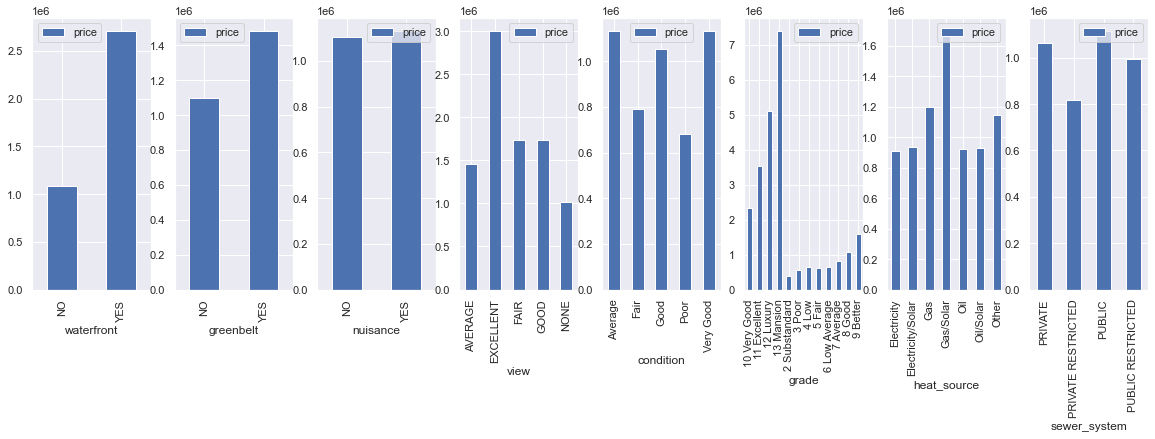

In [117]:
#warning blocker
pd.options.mode.chained_assignment = None

#create list of cat features
categorical_features = re.select_dtypes("object").columns

#create df of categorical features
categorical_re = re.select_dtypes(include=['object'])

#drop date and address
categorical_re.drop(columns=['date', 'address'], inplace = True)

#turn list into numpy array
categorical_features = np.array(categorical_re.columns)

#set plots to be graphed on
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(20,5))

#graph each categorical feature using enumerate
for index, feature in enumerate(categorical_features):
    re.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Upon examining the graphs we find some useful information:

- Everything seems to have atleast a slight variance across each of it's individual values.
- Looking at the y-axis, `grade` seems to be the most significant, followed by `view` and `waterfront`. 

So lets start with grade, and one hot encode new dummy values

In [118]:
iterated_X1 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage','sqft_basement',
                  'floors', 'yr_built', 'yr_renovated', 'grade']]

#encode dummy variables
iterated_X1 = pd.get_dummies(iterated_X1, columns=['grade']) 
iterated_X1.head()

,sqft_living,sqft_patio,bedrooms,sqft_garage,sqft_basement,floors,yr_built,yr_renovated,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,40,4,0,0,1.0,1969,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2770,240,5,0,1570,1.0,1950,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2880,0,6,0,1580,1.0,1956,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2160,270,3,200,1070,2.0,2010,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1120,30,2,550,550,2.0,2012,0,0,0,0,0,0,0,0,0,0,1,0,0


Since `grade_2Substandard` is the worst level, we will drop it, and use it as the baseline

In [119]:
#drop lowest grade row as the baseline
iterated_X1.drop('grade_2 Substandard', axis=1, inplace=True)
iterated_X1.head()

,sqft_living,sqft_patio,bedrooms,sqft_garage,sqft_basement,floors,yr_built,yr_renovated,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,40,4,0,0,1.0,1969,0,0,0,0,0,0,0,0,0,1,0,0
1,2770,240,5,0,1570,1.0,1950,0,0,0,0,0,0,0,0,0,1,0,0
2,2880,0,6,0,1580,1.0,1956,0,0,0,0,0,0,0,0,0,1,0,0
3,2160,270,3,200,1070,2.0,2010,0,0,0,0,0,0,0,0,0,0,0,1
4,1120,30,2,550,550,2.0,2012,0,0,0,0,0,0,0,0,0,1,0,0


Now, we create our first model with a categorical value

In [120]:
iterated_model1 = sm.OLS(y, sm.add_constant(iterated_X1))
iterated_results1 = iterated_model1.fit()
print(iterated_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1503.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:33:12   Log-Likelihood:            -4.4539e+05
No. Observations:               30111   AIC:                         8.908e+05
Df Residuals:                   30091   BIC:                         8.910e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.489e+06   7

Our model as a whole is statistically significant, and the adjusted r squared has increased from 40.3% to 48.7%

However, all the coefficients for `grade` that are below 11 are not statistically significant.

So let's try engineering a new feature that is only the higher level grades. We will create a new row called `high_grade` that will say "yes" if the grade is 11 or up, and "no" if the grade is below 11. We will then create new dummy values and run a new model with our new column instead of `grade`

In [121]:
#create new column using lambda function that says 'yes' if the grade is 11 or more
re['high_grade'] = re['grade'].apply(lambda x: 'yes' if 
                                     x.__contains__('11') or
                                     x.__contains__('12') or
                                     x.__contains__('13')
                                     else 'no')

In [122]:
iterated_X2 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage','sqft_basement',
                  'floors', 'yr_built', 'yr_renovated', 'high_grade']]
iterated_X2 = pd.get_dummies(iterated_X2, columns=['high_grade'], drop_first=True) 
iterated_X2.head()

,sqft_living,sqft_patio,bedrooms,sqft_garage,sqft_basement,floors,yr_built,yr_renovated,high_grade_yes
0,1180,40,4,0,0,1.0,1969,0,0
1,2770,240,5,0,1570,1.0,1950,0,0
2,2880,0,6,0,1580,1.0,1956,0,0
3,2160,270,3,200,1070,2.0,2010,0,0
4,1120,30,2,550,550,2.0,2012,0,0


In [123]:
iterated_model2 = sm.OLS(y, sm.add_constant(iterated_X2))
iterated_results2 = iterated_model2.fit()

#for now only pull up adjusted r^2 and p values
print(f'r^2 Adj: {iterated_results2.rsquared_adj}')
print(f'p values:\n {iterated_results2.pvalues}')

r^2 Adj: 0.4412061147471078
p values:
 const             4.234582e-48
sqft_living       0.000000e+00
sqft_patio        2.807085e-42
bedrooms          1.037692e-87
sqft_garage       3.505635e-06
sqft_basement     6.806510e-08
floors            2.683107e-20
yr_built          1.683872e-43
yr_renovated      6.127883e-16
high_grade_yes    0.000000e+00
dtype: float64


Although, this model has a slightly lower adjusted r squared then the previous model, at only 44.1%, it is still much better then our original model. Additionally, all the variables are now statistically significant. 

Lets pull up the value counts to see if there is a significant number of higher grade houses.

In [124]:
#value counts of the high grade column
re.high_grade.value_counts()

no     29559
yes      552
Name: high_grade, dtype: int64

We see that since there is such a small amount of high graded houses, `grade` only becomes a significant factor for houses with grades 11-13.

Let's add in view now, to see how it affects our model

In [125]:
iterated_X3 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'sqft_garage','sqft_basement',
                  'floors', 'yr_built', 'yr_renovated', 'high_grade', 'view']]
iterated_X3 = pd.get_dummies(iterated_X3, columns=['high_grade', 'view']) 
iterated_X3.drop(['view_NONE','high_grade_no'], axis=1, inplace=True)

In [126]:
iterated_model3 = sm.OLS(y, sm.add_constant(iterated_X3))
iterated_results3 = iterated_model3.fit()
print(f'R^2 Adj: {iterated_results3.rsquared_adj}')
print(f'P values:\n {iterated_results3.pvalues}')

R^2 Adj: 0.46779088773981725
P values:
 const             1.795149e-39
sqft_living       0.000000e+00
sqft_patio        1.144995e-20
bedrooms          1.611296e-59
sqft_garage       1.837180e-03
sqft_basement     3.149082e-02
floors            1.159374e-21
yr_built          1.088882e-35
yr_renovated      1.339835e-08
high_grade_yes    0.000000e+00
view_AVERAGE      2.472675e-11
view_EXCELLENT    0.000000e+00
view_FAIR         1.656540e-13
view_GOOD         2.396306e-10
dtype: float64


Now that is a significantly better adjusted r-squared and all of our values our significant.

However, lets check out the value counts to see if there is a significant amount of data.

In [127]:
re.view.value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [128]:
#taking percentage of houses with no view
print(f'Percentage with no view: {round(26555/30111*100,2)}')

Percentage with no view: 88.19


Since roughly 90% of the data has no view this factor only becomes significant when a house has a view.

Instead of going through each categories value counts one by one, lets just pull them up now, to see which one has a fair distribution of values

In [129]:
#create new df of categorical factors
categoricals = re.select_dtypes("object")

#drop non relevant columns as well as columns that we have used already
categoricals.drop(['date', 'address', 'grade','view','high_grade'], axis=1, inplace=True)

#print value counts for every column
for col in categoricals:
    print(re[col].value_counts(), "\n")

NO     29600
YES      511
Name: waterfront, dtype: int64 

NO     29339
YES      772
Name: greenbelt, dtype: int64 

NO     24862
YES     5249
Name: nuisance, dtype: int64 

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25767
PRIVATE                4336
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64 



The main things to note here are:
`waterfront`: the vast majority of the data is not on a waterfront.
`greenbelt`: the vast majority of the data is not on greenbelt areas.
`nuisance`: there is a significant minority of the data that is in areas with nuisances.
`condition`: There are very few houses below average condition.
`heat_source`: Most of the houses run on gas, although there are still a fair amount that run on electricity or oil.
`sewer_system`: There is a significant minority of the data that uses a private sewer system.

In [130]:
categorical_col = list(categoricals.columns.values)
categorical_col

['waterfront',
 'greenbelt',
 'nuisance',
 'condition',
 'heat_source',
 'sewer_system']

Although we don't have a model with all the categorical factors. However, we did try adding them, yet they didn't have much of an effect on the adjusted r&sup2;

In [131]:
iterated_X4 = re[['sqft_living', 'sqft_patio', 'bedrooms',
                  'floors', 'yr_built', 'yr_renovated','high_grade', 'view', 'waterfront',
                  'nuisance', 'condition','sewer_system']]
iterated_X4 = pd.get_dummies(iterated_X4, columns=['high_grade', 'view', 'waterfront',
                                                   'nuisance', 'condition','sewer_system']) 
iterated_X4.drop(['view_NONE','high_grade_no', 'waterfront_NO', 'nuisance_NO','condition_Poor',
                  'sewer_system_PRIVATE'], axis=1, inplace=True)
iterated_model4 = sm.OLS(y, sm.add_constant(iterated_X4))
iterated_results4 = iterated_model4.fit()
print(f'R^2 Adj: {iterated_results4.rsquared_adj}')
print(f'P values:\n {iterated_results4.pvalues}')

R^2 Adj: 0.4821301296199909
P values:
 const                               2.792621e-31
sqft_living                         0.000000e+00
sqft_patio                          2.272259e-31
bedrooms                            8.457273e-70
floors                              3.263123e-12
yr_built                            7.082854e-35
yr_renovated                        9.360324e-08
high_grade_yes                      0.000000e+00
view_AVERAGE                        4.805505e-06
view_EXCELLENT                     1.656982e-114
view_FAIR                           1.975433e-11
view_GOOD                           3.974847e-05
waterfront_YES                      6.261597e-98
nuisance_YES                        6.528996e-12
condition_Average                   1.364019e-01
condition_Fair                      6.797705e-01
condition_Good                      9.776616e-02
condition_Very Good                 1.874762e-02
sewer_system_PRIVATE RESTRICTED     1.884776e-01
sewer_system_PUBLIC           

With some tinkering with the categorical columns we get this model. The model now has an adjusted r&sup2; of 48.2%. However, some of the p values for the predictors are no longer significant. lets see if we can break down some of these columns into larger groups to get significant p values for every predictor. We can also take out `sqft_garage` and `sqft_basement` as they didn't have any affect on the model.

Let's break the `sewer_system` column down into 2 values, that say whether it's public or private. Additionally let's break down the `condition` column into 2 values, whether it is atleast in "good" condition.

In [132]:
#again we'll create lambda functions that create a new column that says if the sewer system is
#public. Additionally we'll create a new column that says if the house is good condition or
#very good condition. Since these both contain 'good' we can just use contains on that word
re['sewer_system_public'] = re['sewer_system'].apply(lambda x: 'yes' if 
                                     x.__contains__('PUBLIC')
                                     else 'no')
re['good_condition'] = re['condition'].apply(lambda x: 'yes' if 
                                     x.__contains__('Good')
                                     else 'no')
print(re.sewer_system_public.value_counts())
print(re.good_condition.value_counts())

yes    25770
no      4341
Name: sewer_system_public, dtype: int64
no     18801
yes    11310
Name: good_condition, dtype: int64


Now we will create and run our new model

In [133]:
iterated_X5 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'yr_built', 'yr_renovated',
                  'high_grade', 'view', 'waterfront', 'nuisance', 'good_condition',
                  'sewer_system_public']]
iterated_X5 = pd.get_dummies(iterated_X5, columns=['high_grade', 'view', 'waterfront',
                                                   'nuisance', 'good_condition',
                                                   'sewer_system_public']) 

#baseline columns to drop: houses with no good, houses without high grade, houses not on the
# water, houses without nuisances, houses that are below good condition, houses with private
#sewer system
iterated_X5.drop(['view_NONE','high_grade_no', 'waterfront_NO', 'nuisance_NO',
                  'good_condition_no', 'sewer_system_public_no'], 
                 axis=1, inplace=True)
iterated_model5 = sm.OLS(y, sm.add_constant(iterated_X5))
iterated_results5 = iterated_model5.fit()
print(f'R^2 Adj: {iterated_results5.rsquared_adj}')
print(f'P values:\n {iterated_results5.pvalues}')

R^2 Adj: 0.48092902124601145
P values:
 const                       2.092652e-25
sqft_living                 0.000000e+00
sqft_patio                  1.586113e-32
bedrooms                    6.073260e-72
yr_built                    1.695862e-25
yr_renovated                3.056889e-09
high_grade_yes              0.000000e+00
view_AVERAGE                7.774605e-06
view_EXCELLENT             6.606898e-113
view_FAIR                   3.840854e-11
view_GOOD                   4.653519e-05
waterfront_YES              4.614670e-98
nuisance_YES                4.031773e-13
good_condition_yes          3.393990e-03
sewer_system_public_yes    1.486535e-108
dtype: float64


Now we have our highest adjusted r&sup2; is it's highest yet at 48.1% and all the p values for coefficients are significant

Using some basic googling and common knowledge it seems like one of the main factors in price is location. As such let's create a new column that isolates the zipcode. We will do use by using the str method on the address column.

In [134]:
#with a little searching in the address column we find that the zipcode is always from the 20th
# to last place until the 15th to last place. We will create a new column with zipcode
re['zipcode'] = re['address'].str[-20:-15]
re.zipcode.head()

0    98055
1    98133
2    98178
3    98118
4    98027
Name: zipcode, dtype: object

In [135]:
iterated_X6 = re[['sqft_living', 'sqft_patio', 'bedrooms', 'yr_built', 'yr_renovated',
                  'high_grade', 'view', 'waterfront', 'nuisance', 'good_condition',
                  'sewer_system_public', 'zipcode']]
iterated_X6 = pd.get_dummies(iterated_X6, columns=['high_grade', 'view', 'waterfront',
                                                   'nuisance', 'good_condition',
                                                   'sewer_system_public','zipcode'])
#drop same columns as before as well as zipcode 99504 as baseline
iterated_X6.drop(['view_NONE','high_grade_no', 'waterfront_NO', 'nuisance_NO',
                  'good_condition_no', 'sewer_system_public_no', 'zipcode_99504'],
                 axis=1, inplace=True)
iterated_model6 = sm.OLS(y, sm.add_constant(iterated_X6))
iterated_results6 = iterated_model6.fit()
print(iterated_results6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     139.1
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:33:16   Log-Likelihood:            -4.3925e+05
No. Observations:               30111   AIC:                         8.793e+05
Df Residuals:                   29698   BIC:                         8.828e+05
Df Model:                         412                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [136]:
iterated_results6_mae = mean_absolute_error(y, 
                                            iterated_results6.predict
                                            (sm.add_constant(iterated_X6)))
print(f'Iterated Model 5 Mae: {round(iterated_results6_mae,2)}')

Iterated Model 5 Mae: 256787.05


## Final Model results

Although we may do some slight tinkering with the model after this(ex: scaling, centering, or other minor changes) this will be our final model.

### Data Understanding and Preparation

Our final model included these factors:

   - `sqft_living` 
   - `sqft_patio` 
   - `bedrooms`
   - `yr_built` 
   - `yr_renovated`
   - `high_grade`
   - `view` 
   - `waterfront` 
   - `nuisance`
   - `good_condition`
   - `sewer_system_public`
   - `zipcode`
    
We performed data cleaning on the data frame as a whole and removed a small amount of columns with missing values. We also created new factors based on the given ones, by categorizes houses with grades 11 and up with a high grade. We also grouped the condition column into 2 groups, based on whether it had atleast a good condition. We also group the sewer system into, 2 groups whether it was public or private. Then we one-hot encoded `high_grade`, `view`, `waterfront`, `nuisance`, `good_condition`, `sewer_system_public`, `zipcode`, resulting in 9 dummy predictors, not including the dummy predictors for each zipcode.

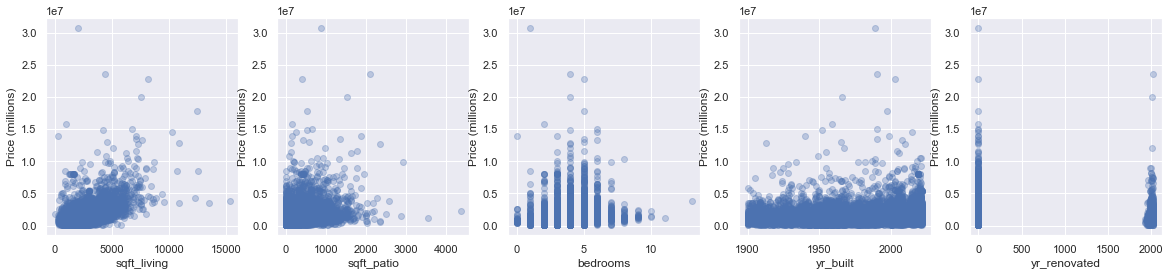

In [137]:
# create list of numeric columns from the model
columns = ['sqft_living', 'sqft_patio', 'bedrooms', 'yr_built', 'yr_renovated']

# Create a figure with 5 subplots
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Plot each scatterplot in a separate subplot
for i, col in enumerate(columns):
    axs[i].scatter(re[col], re['price'], alpha=0.3)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price (millions)')

# Show the plot
plt.show()

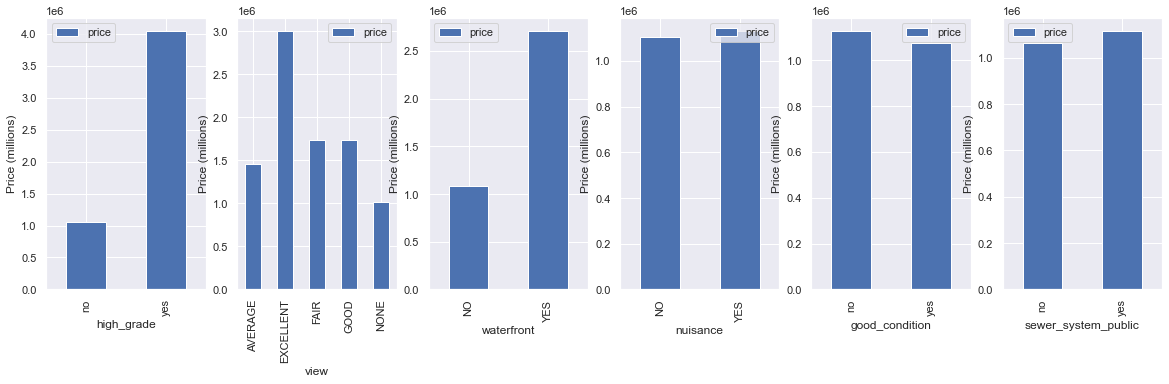

In [138]:
#everything except zipcode, as there are too many
pd.options.mode.chained_assignment = None

#creating df with all the categorical data in model except zipcode
final_categorical_re = re.loc[:, ['high_grade', 'view', 'waterfront', 'nuisance',
                                  'good_condition','sewer_system_public']]
# creating numpy array with just the column names from our new df.
final_categorical_features = np.array(final_categorical_re.columns)

fig, axes = plt.subplots(ncols=len(final_categorical_features), figsize=(20,5))

#plot the mean of each column by using groupby
for index, feature in enumerate(final_categorical_features):
    ax = re.groupby(feature).mean().plot.bar(y="price", ax=axes[index])
    ax.set_ylabel("Price (millions)")

### Model Metrics

These features were fed into an ordinary least-squares multiple regression model. This model:

- is statistically significant overall (F-statistic p-value 0.00)
- explains about 65% of the variance in Price (adjusted R-Squared 0.654)
- is off by about \\$257K in an average prediction (MAE 256787.05)


### Model Interpretation

Below are all model coefficients and p-values(again excluding zipcode as there are far too many):

In [139]:
#concat params of our model with p values
iterated_results6_stats = pd.concat([iterated_results6.params, iterated_results6.pvalues], axis=1)

#name columns
iterated_results6_stats.columns = ['coefficient', 'p-value']

#create a mask on zipcode column
mask = iterated_results6_stats.index.str.contains('zipcode')

# create df with just zipcode column
iterated_results6_zcode = iterated_results6_stats[mask]

# create df that is the opposite of the mask, aka everything but zipcode
iterated_results6_stats = iterated_results6_stats[~mask]
iterated_results6_stats

,coefficient,p-value
const,2.999974e+06,9.277376e-16
sqft_living,3.948094e+02,0.000000e+00
sqft_patio,8.563196e+01,2.052019e-09
bedrooms,-4.617225e+04,3.618708e-27
yr_built,4.369200e+02,9.221303e-04
yr_renovated,4.632937e+01,2.942656e-09
high_grade_yes,1.066903e+06,0.000000e+00
view_AVERAGE,8.003231e+04,1.066226e-09
view_EXCELLENT,8.135098e+05,5.687764e-187
view_FAIR,1.912627e+05,1.357222e-07


We now will print summary statistics for all the zipcode columns

In [140]:
#pull up descriptive stats of zipcode df
iterated_results6_zcode.describe()

,coefficient,p-value
count,3.980000e+02,3.980000e+02
mean,-3.488482e+06,2.968359e-04
std,4.507939e+05,5.294316e-03
min,-5.923721e+06,4.204451e-52
25%,-3.693805e+06,5.131199e-26
50%,-3.531579e+06,5.092964e-14
75%,-3.343844e+06,2.080803e-09
max,-4.419825e+05,1.051380e-01


To summarize:

The constant:
- For a house  with 0 `sqft_living` and `sqft_patio` area, as well as 0 `bedrooms`. Thats `yr_built` and `yr_renovated` are 0(meaning it was built in 1900 and never renovated. With a house `grade` below 11, no `view`, not on a `waterfront`, with no traffic or other `nuisance`, in below good `condition`, that uses a private `sewer_system`, will have a value just around \\$3 million.
    - Again, it is fine that this number doesn't make sense, as there is no such thing as a house with 0 sqft, etc.

The coefficients:
- `sqft_living`              394.8094
    - For an increase in 1 square foot of living area, price increases by \\$395.
- `sqft_patio`                 85.6320
    - For an increase in 1 square foot of patio area, price increases by \\$86.
- `bedrooms`               -4.617e+04
    - This means that for every bedroom in a house there is a decrease in price of around \\$46k. As we mentioned earlier this value is quite strange, as bedrooms has a positive relationship with price. Although we already tested for high correlation between features, this negative number may be a result of some sort of bedrooms being correlated with other predictor variables in the model that also have an effect on price, and the negative coefficient for 'bedrooms' is capturing the joint effect of these variables.
- `yr_built`                 436.9200
    - For every increase in year above 1900 the price goes up by \\$436. In other words the newer the house is the more it will cost.
- `yr_renovated`               46.3294
    - Similar to the year the house was built, the newer the renovation done on the house the more it will cost.
- `high_grade_yes`           1.067e+06
    - This category is indicating whether the house has a grade of 11 or above. Grades 11-13 indicate whether it's "Excellent", "Luxury", or "Mansion". If it is in one of these categories the price will go up by over \\$1 million dollars.
- `view_AVERAGE`             8.003e+04
- `view_EXCELLENT`           8.135e+05
- `view_FAIR`               1.913e+05
- `view_GOOD`                 1.53e+05
    - These next 4 are describing the relationship that the houses view has on its price. They are all being compared to houses with no view at all. If the house does have a view from "Average" to "Excellent", this price will go up by \\$80k-\\$813k on average.
- `waterfront_YES`           7.651e+05
    - Whether the house is on a waterfront will also have a major impact on it's price, and on average will cause a price increase of \\$765k.
- `nuisance_YES`            -3.967e+04
    - Whether the house has traffic noise or other recorded nuisances will cause the price of the house to drop by \\$40k on average. 
- `good_condition_yes`       5.201e+04
   - Whether the overall condition of the house it good or better, in terms of its maintenance will cause the house price to increase by \\$52k on average.
- `sewer_system_public_yes`  2.419e+04  
    - Whether the house uses a public sewer system in comparison to a private one will increase it's value on average by \\$24k. 
- `zipcode` ranged from -\\$441k to -\\$5.9 million
    - All these zipcodes were compared to zipcode 99504, and have a negative slope in comparison

All the coefficients in the model were statistically significant except for one zipcode. Most of the coefficients is this model are quite logical, that they are positive vs negative. The only major standout is bedrooms, in that more bedrooms is generally viewed as having a positive impact on the houses price. The combination of this coefficient, a MAE of \\$257k, and an adjusted r&sup2; not quite close enough to 1, indicates there is still room for improvement of the model. Perhaps given other data about the neighborhood of the houses, proximity to houses of worship, details whether the house is more kid friendly, etc. could allow us to create a more accurate model.

## Data Transformations

Now let's move on to some minor data transformations to see if the data is more interpretable this way:

### Centering

Centering won't help us, as there are many non continuous variables.

### Standardizing

Although standardizing includes centering, it can give us useful information about the magnitude of our numeric factors and which one has the greatest affect.

In [141]:
#make list of numeric columns
num_cols = ['sqft_living', 'sqft_patio', 'bedrooms','yr_built','yr_renovated']

#copy final X values as new standardized X
X_standardized = iterated_X6.copy()

#rename standard scaler function from sklearn
scaler = StandardScaler()

#standardize the columns
X_standardized[num_cols] = scaler.fit_transform(X_standardized[num_cols])

In [142]:
standardized_model = sm.OLS(y, sm.add_constant(X_standardized))
standardized_results = standardized_model.fit()

In [143]:
#print title
print("Original Model Coefficients:")

#print just the parameters of our original model
for col in iterated_results6.params.index:
    #print on the numeric parameters, by using if statement to stop the for loop if the column
    #is high grade(aka first categorical column)
    if col != 'high_grade_yes':
        print(col, ':', iterated_results6.params[col])
    else:
        break

Original Model Coefficients:
const : 2999974.0549812047
sqft_living : 394.8094087100302
sqft_patio : 85.63195947051983
bedrooms : -46172.24708865678
yr_built : 436.9199691811809
yr_renovated : 46.32936962787958


In [144]:
#same as above just for standardized model
print("Standardized Model Coefficients:")
for col in standardized_results.params.index:
    if col != 'high_grade_yes':
        print(col, ':', standardized_results.params[col])
    else:
        break

Standardized Model Coefficients:
const : 4562469.351509492
sqft_living : 384322.1240727353
sqft_patio : 21005.341362869527
bedrooms : -45236.75348891498
yr_built : 14004.332469225676
yr_renovated : 19281.853490432914


This means that a one standard deviation increase in:  
    - `sqft_living` will lead to a \\$384k increase in price  
    - `sqft_patio` will lead to a \\$21k increase in price

### Model diagnostics

We will analyze the model to make sure it passes all the assumptions of linear regressions.

### 1. Linearity

Below are partial regression plots for all model features except for zipcode(as there are too many):

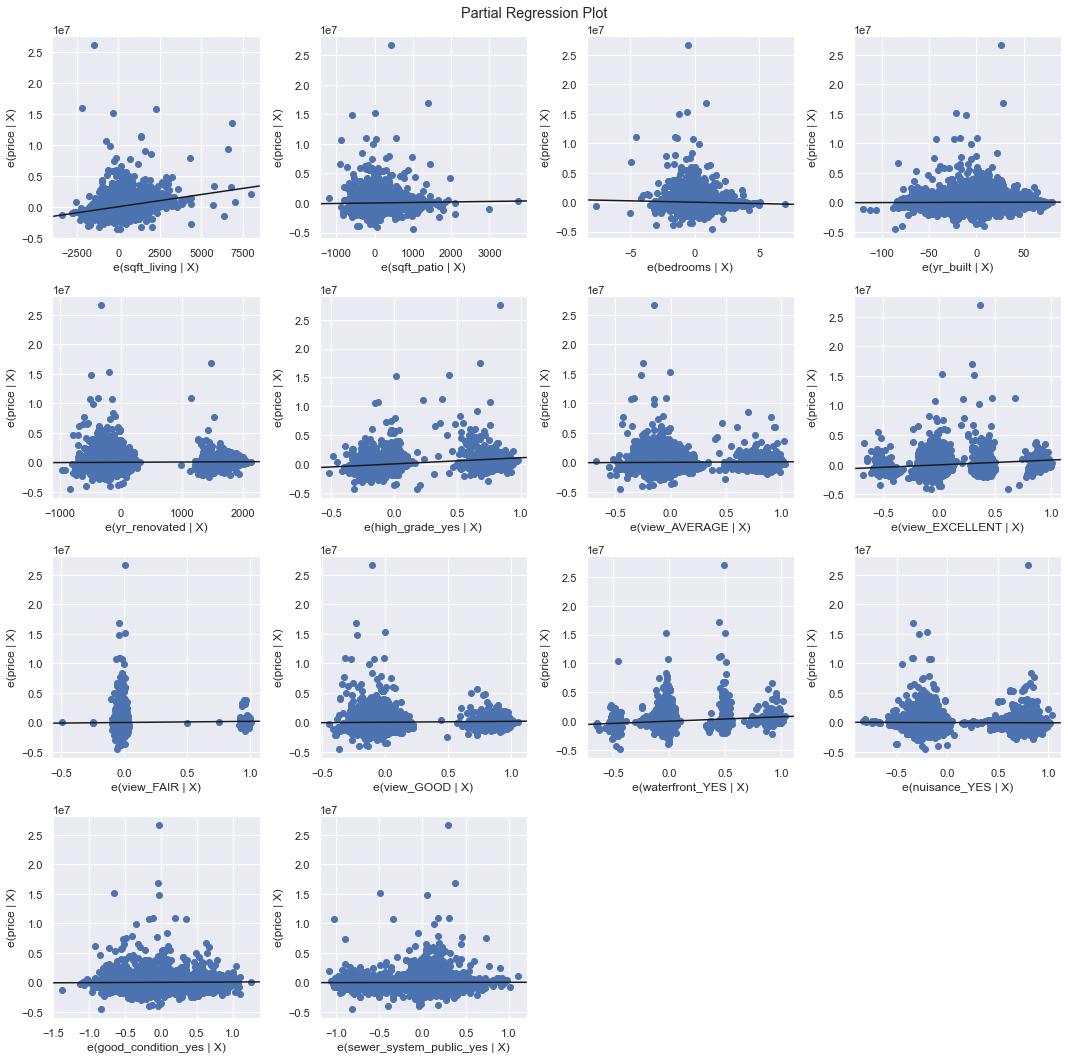

In [145]:
#copy our final X values
iterated_X6_copy = iterated_X6.copy()

#drop zipcode column
iterated_X6_copy.drop([col for col in iterated_X6_copy.columns if 'zipcode' in col],
                      axis=1,inplace=True)

#plot partial regression plots of our factors against price
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    iterated_results6,
    exog_idx=list(iterated_X6_copy.columns),
    grid=(4,4),
    fig=fig)

plt.tight_layout()
plt.show()

Most of the data is not looking very linear. Let's just do a linear rainbow test to confirm this.

In [146]:
#import linear rainbow test
from statsmodels.stats.diagnostic import linear_rainbow

#run test on our model
rainbow_statistic, p_value = linear_rainbow(iterated_results6)

#print p value
print(f'Linear Rainbow p value: {p_value}')

Linear Rainbow p value: 6.626729250527864e-29


The p-value is well below an alpha level of .05. As such we can reject the null, and say that indeed the data is not very linear.

To solve this issue let's try doing a log transformation of our data reduces the order of magnitude, making the higher values lower and lower values higher, it also should undo exponentiation.

Let's log transform our target variable

In [147]:
#log transform the y value using numpy
y_log = np.log(y)

In [148]:
#run the model with our new y value(y_log)
log_model1 = sm.OLS(y_log, sm.add_constant(iterated_X6))
log_results1 = log_model1.fit()
print(log_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     157.2
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:35:03   Log-Likelihood:                -9009.8
No. Observations:               30111   AIC:                         1.885e+04
Df Residuals:                   29698   BIC:                         2.228e+04
Df Model:                         412                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [150]:
#create the prediction values for y log
y_log_pred = log_results1.predict(sm.add_constant(iterated_X6))

# Then, calculate the MAE
log_model1_mae = mean_absolute_error(y_log, y_log_pred)

print(f'Log Model 1 Mae: {round(log_model1_mae,2)}')

Log Model 1 Mae: 0.2


### Log Transformed Model Analysis

Notable differences with our new model:

- Our new model now explains about 68%(adjusted R-Squared 0.681) of the variance in Price while our old model was only around 65%.
- Our model as a whole is statistically significant as well as the constant. However, a small minority of our coefficients are no longer statistically significant. These include: `bedrooms`, `sewer_system_public_yes`, and a small number of zipcodes. 
- There is a new way to interpret slope:
    - For ex: For each increase of 1 unit in `sqft_living`, we see an associated positive change of .03% in house price.
    - For each increase of 1 unit in `sqft_patio`, we see an associated positive change of .006% in house price.
- The new MAE is .2. This is interpreted as:
    -  on average the model's predictions are off by a factor of e^(0.2) = 1.22, which corresponds to a 22% error in the target variable values.

Now, let's try running a new linear rainbow test to see how linear the data is

In [151]:
from statsmodels.stats.diagnostic import linear_rainbow
rainbow_statistic, p_value = linear_rainbow(log_results1)
print(f'Linear Rainbow p value: {p_value}')

Linear Rainbow p value: 0.9626540226414979


With a p-value of .96 we do not have nearly enough evidence to reject the null(that the data is linear), so we will conclude that our data is probably linear.

### 2. Independence

We already made sure to not use factors with high correlation with eachother. Nonetheless we will pull up the code again here. Again we will use a cutoff correlation of .7.

In [152]:
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

hi_corr = re.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
hi_corr['pairs'] = list(zip(hi_corr.level_0, hi_corr.level_1))

# set index to pairs
hi_corr.set_index(['pairs'], inplace = True)

#drop level columns
hi_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
hi_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
hi_corr.drop_duplicates(inplace=True)
hi_corr[(hi_corr.cc>.7) & (hi_corr.cc <1)]

,cc
pairs,
"(yr_built, age)",0.999888
"(sqft_living, sqft_above)",0.883733
"(sqft_living, bathrooms)",0.772226
"(long, lat)",0.760532


Since we have only used `yr_built` and `sqft_living`. Thus we have no issues of multicollinearity.

### 3. Normality

To check for this lets pull up the distribution of our `iterated_results6` and then the distribution of `log_results`

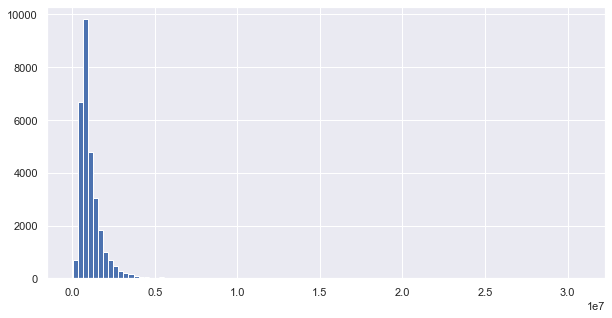

In [153]:
y.hist(bins=100, figsize=(10,5));

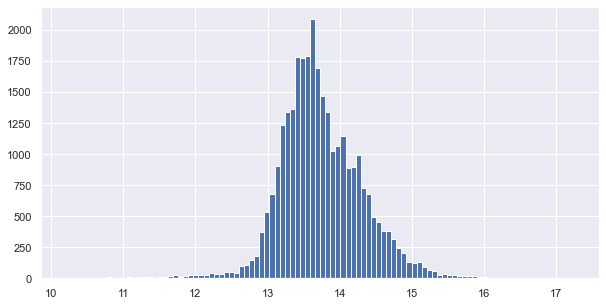

In [154]:
y_log.hist(bins=100, figsize=(10,5));

This histogram looks much more normal. Let's run a Q-Q plot to confirm its normality. 
This method compares two probability distributions by plotting their quantiles against each other.

We will use the Q-Q plot to compare our data to a normal distribution of data. When examining the Q-Q plot we want the data points to follow the diagonal line as closely as possible.

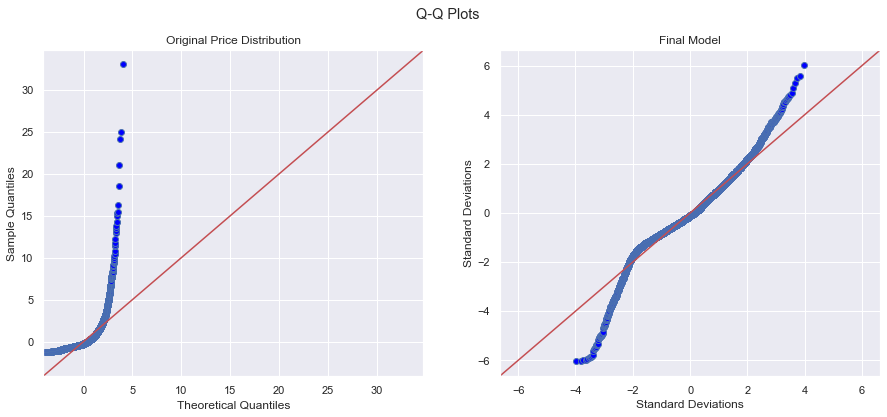

In [155]:
#import necessary stats to run qqplot
import scipy.stats as stats

#create 2 plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,6))

#plot our original data against a normal distribution
sm.graphics.qqplot(y, dist=stats.norm, line='45', fit=True, ax=ax1)

#plot our new log transformed data against a normal distribution
sm.graphics.qqplot(y_log, dist=stats.norm, line='45', fit=True, ax=ax2)

fig.suptitle("Q-Q Plots")
ax1.set_title('Original Price Distribution')
ax2.set_title('Final Model')
ax2.set_xlabel('Standard Deviations')
ax2.set_ylabel('Standard Deviations');

As we saw in the original histogram, the original distribution of `price` has a strong skew to the right. Although the log transformed value isn't perfect it seems close to normal, as most of the values within 2 standard deviations of the mean are very close to the red line.

### 4. Equal Variance: Homoscedasticity


We are hoping that our data is Homoscedastic, meaning that the variable's variability is equal across the range of values of the predictor.

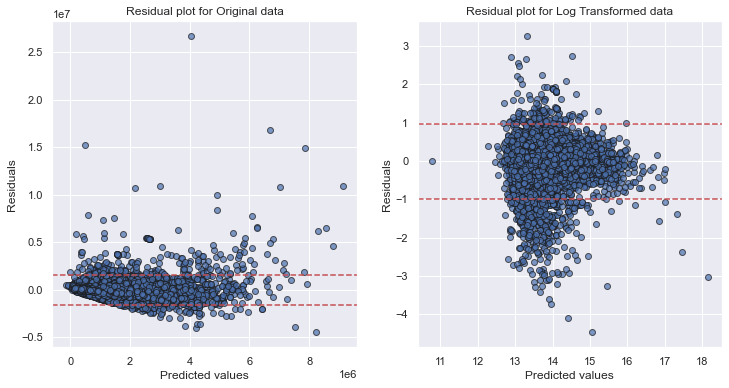

In [156]:
#set models equal to both of our models
models = [iterated_results6, log_results1]

fig, axs = plt.subplots(ncols=len(models), figsize=(12,6))


for i, model in enumerate(models):
    #calculate residuals
    residuals = model.resid
    
    #create scatterplot of the predicted values vs residuals
    axs[i].scatter(model.predict(), residuals, edgecolors='k', alpha=0.7)
    
    #creat border lines 3 standard deviations away from the mean
    axs[i].axhline(y=3*np.std(residuals), color='r', linestyle='--')
    axs[i].axhline(y=-3*np.std(residuals), color='r', linestyle='--')
    
    #set axes labels
    axs[i].set_xlabel('Predicted values')
    axs[i].set_ylabel('Residuals')
    
    #name each plot
    if i == 0:
        axs[i].set_title('Residual plot for Original data')
    else:
        axs[i].set_title('Residual plot for Log Transformed data')


plt.show()

Both plots are not looking very homoscedastic. However, we will run Breusch-Pagan tests on both to confirm this

In [157]:
#import breusch pagan test to test for homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

#run the test on both our models
bp_test_original = het_breuschpagan(iterated_results6.resid, sm.add_constant(iterated_X6))
bp_test_log = het_breuschpagan(log_results1.resid, sm.add_constant(iterated_X6))

#set the p values for each test
bp_p_value1 = bp_test_original[3]
bp_p_value_log = bp_test_log[3]


print(f'Breusch-Pagan original Model Value: {bp_p_value1}')
print(f'Breusch-Pagan log Model Value: {bp_p_value_log}')

Breusch-Pagan original Model Value: 1.0821015815767728e-103
Breusch-Pagan log Model Value: 2.8311527388174474e-17


For both of our models we reject the null hypothesis and thus assume that both models are heteroscedastic. 

### Patio Statistics

Lets pull up some summary patio statistics so we can give adequate advice about patio size.

In [158]:
data = re.copy()

#drop all rows where there is no patio
data = data.drop(data[data['sqft_patio'] == 0].index)

#create a column that takes the ratio of patio space to living area
data['patiovsliving'] = data['sqft_patio']/data['sqft_living']

#create a column that takes the ratio of patio space to lot size
data['patiovslot'] = data['sqft_patio']/data['sqft_lot']

#create a df with just these 2 columns
data = data[['patiovsliving', 'patiovslot']]
data.describe()

,patiovsliving,patiovslot
count,23365.000000,23365.000000
mean,0.134101,0.054154
std,0.112929,0.093422
min,0.002208,0.000036
25%,0.054545,0.012710
50%,0.100503,0.027143
75%,0.184466,0.050414
max,1.792453,0.941176


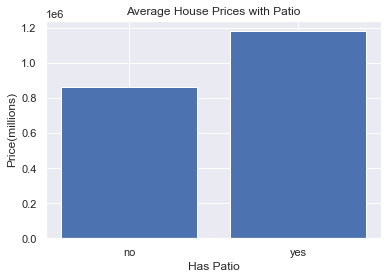

In [159]:
import matplotlib.ticker as ticker

df = re.copy()

#create column that says whether the house has a patio
df['has_patio'] = df['sqft_patio'].apply(lambda x: 'yes' if x > 0 else 'no')

#group the column based on whether it has a patio and calculate the mean
patio_price = df.groupby('has_patio')['price'].mean()

#create a bar chart of average price of houses with and without patio
fig, ax = plt.subplots(figsize= (6,4))
ax.bar(patio_price.index, patio_price.values)

# Set the title and axis labels
ax.set_title('Average House Prices with Patio')
ax.set_xlabel('Has Patio')
ax.set_ylabel('Price(millions)')

# Show the plot
plt.show()

We see that overall houses with patios cost more than houses without. Additionally the median patio size compared to living area is around 10% and median patio size compared to lot size is around 3%

## Conclusion

We will now sum up the analysis, and give our advice to the stakeholder based on our model. 

After our final analysis we had 2 options for our final model. The first option was the non log transformed version and the second was log transformed. 

1. Adjusted r squared:
    - The original model explained 65%(adjusted R-Squared 0.654) of the variance in price.
    - The log transformed model now explains about 68%(adjusted R-Squared 0.681) of the variance in price.
2. Statistical significance of model:
    - Both models were statistically significant as a whole.
3. Statistical significance of constant and coefficients:
    - The original model has the constant as well as all the coefficients being statistically significant, except for one coefficient of a `zipcode`.
    - The log transformed model has the constant and most of the coefficients being statistically significant. However, the coefficients for `bedrooms`, `sewer_system_public_yes`, and a small number of `zipcodes` are no longer significant.
4. Mean Absolute Error:
    - The mean absolute error for our original model is \\$257k, which means that on average the models predictions are off by \\$257k.
    - The mean absolute error for our log transformed model is .2 which means that on average the model's predictions are off by 22% in the target variable values.
5. LINE (Linearity, Independence, Normality, Equal Variance) Assumptions
    - Our original model is not linear, normal, and is heteroscedastic, meaning it lacks equal variance. However, there is not much multicollinearity issues as each factor is not very dependent on the other factors.
    - Our log transformed model is linear, normal, has minimal multicollinearity; however, it is also heteroscedastic.
    
Overall, the log transformed model is slightly better; however, there is a slight trade off in the interpretability. In our original model an addition of one square foot in patio area leads to a \\$86 increase in price while an addition square foot of living space leads to a \\$395 
increase in price. In our log transformed model the coefficients are read as an increase of one square foot of patio space is associated with a increase of .006% in house price. While an increase of one square foot of living space, will be associated with a .03% in house price.

## Recommendations

Unfortunately for King of the Deck it seems as though adding patio space over living space is not the best investment. So it may pay for them to expand into this field. However, they shouldn't be disheartened as we saw from our model that adding patio space over nothing at all does add to the house price. Additionally, although there are many other factors involved, house prices of those with patios are higher than those without patios. Therefore if they don't want to expand their business they can stick with decks alone as homeowners looking for an aesthetically pleasing deck with much less headache and cost then a full home remodeling will continue to use them. 
In terms of the size of the patio, they should build patios that are around 10% the square footage of the living area and around 3% of the lot area.

## Limitations

As noted earlier, both our final models had an adjusted r&sup2; below .7 as well as mean absolute errors that were each respectively quite high. Both of these indicate that these are not the best models and there is definitely room for improvement

## Next steps

Being that the model could use improvement, we more need more data to better to predict house prices. 
Given more data about:
                                             
1. Proximity to house of worship
2. Proximity to parks
3. Does the house have a pool
4. Square footage of green area/ usable outdoor are of the house
5. Landscaping quality
6. Does the house have a basketball hoop or private courts
7. Family friendly house
8. Family friendly neighborhood
9. Social and Economic factors at the time of sale

I believe given such information we can create a much more accurate model.